# Polinomios de Interpolación

Este notebook está dirijido a trabajar  la idea de aproximar una función continua a un conjunto de datos que conocemos, por medio de la **interpolación**.

De esta manera, tenemos el siguiente problema: tenemos datos discretos y queremos calcular una función continua que los aproxime. 

> Precisamente: dados $m+1$ pares $(x_i, y_i)$, el problema consiste en calcular una función $\Phi=\Phi(x)$ tal que $\Phi(x_i)=y_i$ para $i=0,...,m$ donde $y_i$ es alguno de los valores dado.

### Interpolación polinómica

Consideremos $n+1$ pares $(x_i, y_i)$. El problema es calcular  un polinomio $\prod_m$ $\in$ $\mathbb{P}_m$, llamado polinomio interpolador, de modo que: 

\begin{equation}
\prod_m(x_i) = a_m x_i^m + ... + a_1x_i + a_0 = y_i, \qquad i=0,...,n \qquad \qquad (1)
\end{equation}

donde los puntos $x_i$ se denominan nodos de interpolación.

En clase vimos que el polinomio interpolador existe y tiene la siguiente forma: 

\begin{equation}
\prod_n(x) = \sum_{i=0}^n y_i l_i(x) \qquad \qquad (2)
\end{equation}
donde
\begin{equation}
l_i \in \mathbb{P}_n: \qquad l_i(x)=\prod_{j=0\\j\neq i}^n \frac{x-x_j}{x_i - x_j} \qquad i=0,...,n \qquad \qquad (3)
\end{equation}

La ecuación $(2)$ se conoce como el **polinomio interpolador en la forma de Lagrange**, mientras que los $l_i (x)$ son los polinomios característicos. 

Un enfoque alternativo (que también vimos en clase) es que se puede expresar la ecuación $(2)$ de la siguiente manera: 

\begin{equation}
\prod_{n} (x) = \sum_{i=0}^n \frac{w_{n+1}(x)}{(x-x_i)w_{n+1}^{\prime}(x_i)} y_i \qquad \qquad (4)
\end{equation}

donde $w_{n+1}$ se define como:

$$ w_{n+1}(x) = \prod_{i=0}^n (x-x_i) $$
 y 
$$ w_{n+1}^{\prime}(x_i)=\prod_{i=0\\ j\neq i}^n (x_i - x_j)$$ 

**Ejerciico 1** 

- 1) Utilizando la ecuación (2) ó (4) calcula la expresión análitica que tendría el polinomio interpolador  si se interpolara el conjunto de datos $(x_1, y_1), (x_2, x_2)$
- 2) Implementa el resultado del inciso 1 en una función de nombre Interpolacion01 y comprueba gráficamente que tu resultado sí funciona.
- 3) Utilizando la ecuación (2) ó (4) calcula la expresión análitica que tendría el polinomio interpolador si se interpolara el conjunto de datos $(x_1, y_1), (x_2, y_2), (x_3, y_3)$
- 4) Implementa el resultado den inciso 3 en una función de nombre Interpolación02 y comprueba gráficamente que tu resultado  sí funciona.

**Solución** 
1) L(x) = l1* y1 + l2 * y2

$l1(x)= \frac{x - x_2}{x_1 - x_2} $

$l2(x)=\frac{x - x_1}{x_2 - x_1}$

In [1]:
using Plots  #Una sola vez
using Interact 
using LinearAlgebra
gr()

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-15735920982741487395\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2232150069727835380\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-15735920982741487395\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

In [2]:
# Solución 2
function Interpolacion01(X, Y) #X = [x1, x2]
    x1, x2 = X
    y1, y2 = Y
    
    l1(x) = (1 / (x1 - x2)) * (x - x2)
    l2(x) = (1 / (x2 - x1)) * (x - x1)
    
    s(x) = (y1*l1(x) + y2*l2(x))
    return s
end

Interpolacion01 (generic function with 1 method)

In [3]:
X = [2, -3]
Y = [1, 2]
s = Interpolacion01(X, Y)

s (generic function with 1 method)

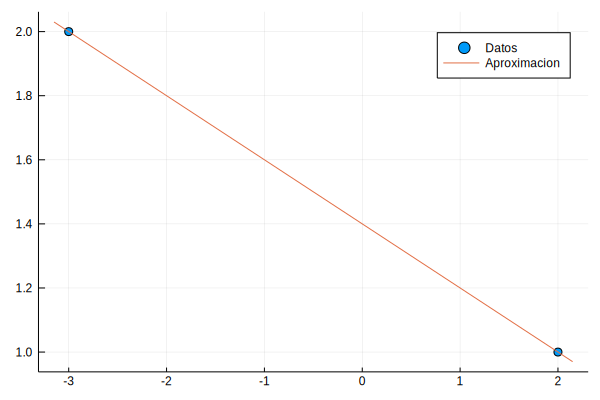

In [4]:
scatter(X, Y, label="Datos")
plot!(s, label="Aproximacion")

# Implementación para N puntos

In [5]:
function lp(x0, p, X)
    α = 1.
    l = 1.
    for i in 1:length(X)
        if i == p
            continue
        end
        α *= X[p] - X[i]
        l *= x0 - X[i]
    end
    return l / α
end

lp (generic function with 1 method)

In [6]:
function Interpola03(X)
    x = [x for (x, _) in X]
    y = [y for (_, y) in X]
    function L(s)
        lps = [lp(s, i, x) for i in 1:length(y)]
        return dot(lps, y)
    end
    return L
end

Interpola03 (generic function with 1 method)

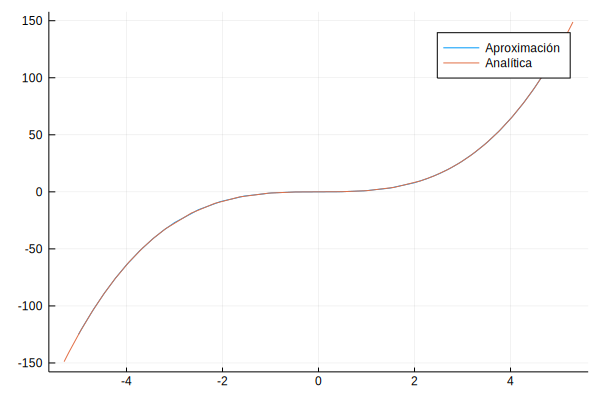

In [7]:
pol_grad_3(x) = x^3
x = 1:4
y = pol_grad_3.(x)
pol_interpola = Interpola03(zip(x, y))
plot(pol_interpola, label="Aproximación")
plot!(pol_grad_3, label="Analítica")

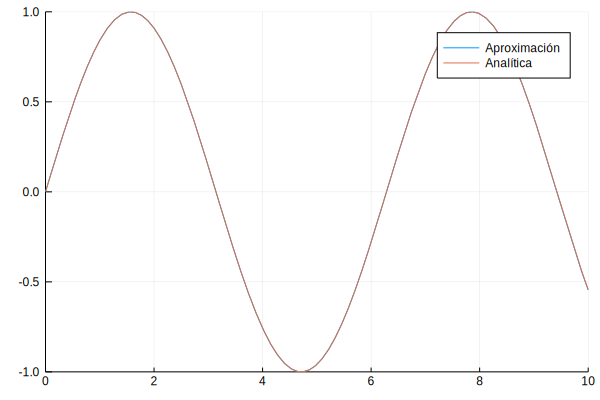

In [8]:
x = 0:10
y = sin.(x)
pol_interpola = Interpola03(zip(x, y))
plot(pol_interpola, xlims=(0,10), ylims=(-1,1), label="Aproximación")
plot!(sin, label="Analítica")

In [14]:

#f(x) = x^2  + x^3 + 1
f(x) = 1/(1 + 25x^2)
@manipulate for n = 1:13
    x = -1:2/n:1
    y = f.(x)
    s = Interpola03(zip(x, y))
    scatter(x, f.(x), xlims=[-1,1], label="Datos")
    #plot!(f, ylim=(-2,2), label="Analítica")
    plot!(s, ylim=(-2,2), label="Aproximación")

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 13,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
7, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/rborja/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rborja/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rborja/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/rborja/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/rborja/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010a1dcb50, Task (runnable) @0x000000010a1dcb50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"16400786692845543044\",\"id\":\"ob_26\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"i

¿Qué observas del ejemplo anterior?

Anota tus observaciones

# Interpolación en puntos espaciados no-uniformemente

En los ejemplos anteriores, la partición de los puntos $\{x_i\}$ se tomaba uniformemente, otra manera de realizar la partición de tal forma que los puntos $\{x_i\}$ se amontonen cerca de los puntos extremos del intervalo es utilizando los puntos de Chebyshev con arámetro n, definidos como: 
$$x_j := cos\left(\frac{j\pi}{n} \right) \qquad con \qquad 0\leq j \leq n $$

In [10]:
#Puntos de Chebyshev
function chebyshev_puntos(n)
    xj = [cos((j*π)/n) for j in 0:n]
    return xj
end

function interpola_cheb(f, n)
    pC = chebyshev_puntos(n)
    pares = zip(pC, f.(pC))
    L = Interpola03(pares)
    return L
end

interpola_cheb (generic function with 1 method)

In [11]:
f(x) = 1/(1 + 25x^2)
@manipulate for n = 1:40
    x = chebyshev_puntos(n)
    y = f.(x)
    s = interpola_cheb(f, n)
    scatter(x, f.(x), xlims=[-1,1], label="Datos")
    plot!(f, label="Analítica")
    plot!(s, label="Aproximación")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 40,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
20, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/rborja/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rborja/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rborja/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/rborja/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/rborja/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010a1dc6d0, Task (runnable) @0x000000010a1dc6d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",

 ¿Qué diferencia notas al utilizar una partición regular de los puntos $\{x_i\}$ y los puntos de Chebyshev?
 
 Anota tu respuesta.